In [1]:
# EDA_and_Preprocessing.ipynb (sample cell content)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load CSV
df = pd.read_csv("../data/yahoo_data.csv")

# Parse dates
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')

# Remove commas and convert numeric columns
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    df[col] = pd.to_numeric(df[col].str.replace(',', '', regex=False), errors='coerce')

# Volume: remove commas and convert to float
df['Volume'] = pd.to_numeric(df['Volume'].str.replace(',', '', regex=False), errors='coerce')

# Set index and fill missing dates
df.set_index('Date', inplace=True)
df = df.asfreq('D')

# Interpolate Close price
df['Close'] = df['Close'].interpolate(method='linear')

# Drop remaining rows with missing 'Close'
df.dropna(subset=['Close'], inplace=True)

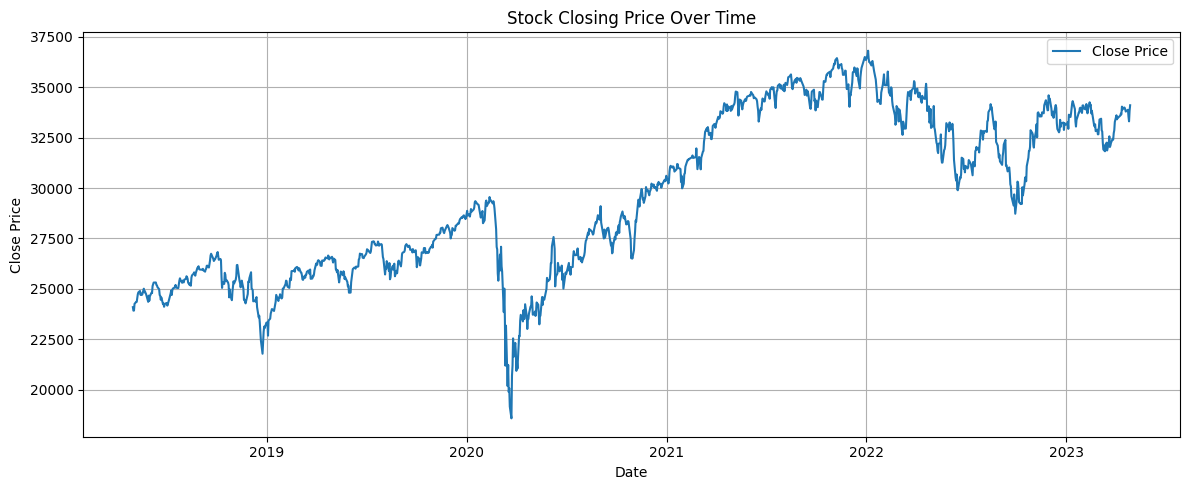

In [11]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Close'], label="Close Price")
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
df.to_csv("../data/cleaned_data.csv")
